# Final Project - Notebook



In [0]:
# make use of our personal google drive
from google.colab import drive

In [0]:
# Using outside libraries that will help with calculations:
# Numerical Python as numpy for number analysis
# pandas as panel data, to help format
# matplotlib with pyplot to graph the results
# and sklearn for the linear regression model.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from collections import defaultdict
import os

# mount our google drive to the virtual server
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd gdrive/

/content/gdrive


In [0]:
cd My\ Drive

/content/gdrive/My Drive


In [0]:
# import the csv file from google drive
ledger = pd.read_csv('NFA 2018.csv')

In [0]:
ledger

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
0,Armenia,ARM,Asia,Western Asia,1992,BiocapPerCap,1.611286e-01,0.135023,0.083836,0.013718,0.033669,0.000000e+00,4.273741e-01,949.033,3449000
1,Armenia,ARM,Asia,Western Asia,1992,BiocapTotGHA,5.558130e+05,465763.337400,289190.662300,47320.224590,116139.598200,0.000000e+00,1.474227e+06,949.033,3449000
2,Armenia,ARM,Asia,Western Asia,1992,EFConsPerCap,3.909225e-01,0.189137,0.000001,0.004138,0.033669,1.112225e+00,1.730092e+00,949.033,3449000
3,Armenia,ARM,Asia,Western Asia,1992,EFConsTotGHA,1.348487e+06,652429.066600,4.327841,14272.803690,116139.598200,3.836620e+06,5.967954e+06,949.033,3449000
4,Armenia,ARM,Asia,Western Asia,1992,EFExportsPerCap,1.124910e-03,0.002283,0.000000,0.000438,0.000000,4.819043e-02,5.203676e-02,949.033,3449000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87015,Luxembourg,LUX,Europe,Western Europe,1999,EFExportsTotGHA,2.727690e+05,38693.594850,529781.310300,38598.597570,0.000000,4.697928e+06,5.577771e+06,87516.400,446000
87016,Luxembourg,LUX,Europe,Western Europe,1999,EFImportsPerCap,9.640340e-01,0.513370,2.175907,0.182401,0.000000,1.672241e+01,2.055812e+01,87516.400,446000
87017,Luxembourg,LUX,Europe,Western Europe,1999,EFImportsTotGHA,4.299939e+05,228981.371100,970532.711500,81357.251260,0.000000,7.458795e+06,9.169660e+06,87516.400,446000
87018,Luxembourg,LUX,Europe,Western Europe,1999,EFProdPerCap,4.959092e-01,0.093481,0.448416,0.000000,0.115181,6.242095e+00,7.395082e+00,87516.400,446000


## Analysis
I have chosen 5 psuedo-random countries to conduct for the models. This is based on the factors of quantity, readability, and location. A survey of a small sample was conducted from my inner peer group to select a country from every continent, and these were the results of their choices. These will be the subjects of the study. Due to some missing data, this study will trim any zero data points for the most accuracy.

In [0]:
countryNames = ["Canada","Japan","Ireland","Nigeria","Australia"]

In [0]:
# to find the starting and end values of our countries
# based on the size of the read data, find the range where
# the ledger has the listing of selected countries
countryRange = []
for i in range(5):
  countryRange.append(np.where(ledger["country"] == countryNames[i]))

Once the range is found on all countries, we can find simple variables to use as a baseline reference. Use the iloc[ ], .head( ), and .tail( ) functions to store the indices of the start and end. iterate through the list of lists using the 'for' function, and trim as necessary.

In [0]:
countryStart = []
for i in range(5):
  countryStart.append(ledger.iloc[countryRange[i]].head(1).index[0])

In [0]:
countryEnd = []
for i in range(5):
  countryEnd.append(ledger.iloc[countryRange[i]].tail(1).index[0])

In [0]:
# declare five empty list of lists
# X for total hectare land
# Y for Carbon Consumption
# Z for Population
# H for years
dataX = [[] for _ in range(5)]
dataY = [[] for _ in range(5)]
dataZ = [[] for _ in range(5)]
dataH = [[] for _ in range(5)]

In [0]:
# write data from the ledger columns
# starting at the first index of selected
# country and interate to last,
# then append to lists
for i in range(5):
  for j in range(countryStart[i],countryEnd[i]):
    dataX[i].append(ledger.iloc[j]["total"])
    dataY[i].append(ledger.iloc[j]["carbon"])
    dataZ[i].append(ledger.iloc[j]["population"])
    dataH[i].append(ledger.iloc[j]["year"])

In [0]:
# Make new lists to trim
# any zero elements in our Carbon measure
# and save for every other list.
dataX_ = [[] for _ in range(5)]
dataY_ = [[] for _ in range(5)]
dataZ_ = [[] for _ in range(5)]
dataH_ = [[] for _ in range(5)]

for i in range(5):
  for x in range(len(dataY[i])):
    if dataY[i][x] != 0:
      dataY_[i].append(dataY[i][x])
      dataX_[i].append(dataX[i][x])
      dataZ_[i].append(dataZ[i][x])
      dataH_[i].append(dataH[i][x])

## Implementation of Machine Learning
The next module will use machine learning tactics with the application of the LinearRegression() model. This helps us see the correlation between the data points we have chosen. It requires five different training sets, so as to not overlap the data. This is because we 'train' the machine to predict they y points based on our current x and y values. We use the y prediction list and regular y list to see the difference between what the algorithm expects and what we have.

In [0]:
regression_model1 = LinearRegression()
regression_model2 = LinearRegression()
regression_model3 = LinearRegression()
regression_model4 = LinearRegression()
regression_model5 = LinearRegression()

In [0]:
# reshape the list of lists
# so the algorithm can read the data
# accurately and correctly
reshape = [[] for _ in range(5)]

for i in range(5):
  reshape[i] = np.array(dataX_[i]).reshape(-1,1)

In [0]:
# give the model training data
# for ever country
regression_model1.fit(reshape[0],dataY_[0])
regression_model2.fit(reshape[1],dataY_[1])
regression_model3.fit(reshape[2],dataY_[2])
regression_model4.fit(reshape[3],dataY_[3])
regression_model5.fit(reshape[4],dataY_[4])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
yPredict = [[] for _ in range(5)]
r2 = [[] for _ in range(5)]
# create y predictions
# based on x values
yPredict[0] = regression_model1.predict(reshape[0])
yPredict[1] = regression_model2.predict(reshape[1])
yPredict[2] = regression_model3.predict(reshape[2])
yPredict[3] = regression_model4.predict(reshape[3])
yPredict[4] = regression_model5.predict(reshape[4])
# calculate the r2 value using
# new y predictions
for i in range(5):
  r2[i] = r2_score(dataY_[i],yPredict[i])

# Model and Interpretation

In the next module we will print the statistical data for the beginning and final data point of the country. If one was to delve further into this study, or is generally curious of the logistics, it will provide a simple log.



To interpret the items we made in the previous section, we will make graphical models of the data lists. The first graph will plot total hectare lands, which includes forestry, fishing, farming and city infrastructure, and plot it against the hectares needed to reach minimum 0 carbon footprint. The second graphical depiction is the population size per year. We use both graphs to deduce if there exists a relationship between the two models.
Further, We will apply a machine learning algorithm to find the relationship between the points, namely using linear regression. 


After the graph the R-squared score will be produced. This indicates the relationship between the line of best fit to the data points on the graph. The closer to 1 this value becomes, the stronger the correlation.

## First Observation - Canada


In [0]:
print(ledger.iloc[countryStart[0]])
print('#########################################')
print(ledger.iloc[countryEnd[0]])

country                            Canada
ISO alpha-3 code                      CAN
UN_region                   North America
UN_subregion                North America
year                                 1961
record                       BiocapPerCap
crop_land                          1.4701
grazing_land                     0.638362
forest_land                       17.2488
fishing_ground                    6.88245
built_up_land                   0.0165517
carbon                                  0
total                             26.2563
Percapita GDP (2010 USD)          17861.9
population                       18296000
Name: 11400, dtype: object
#########################################
country                            Canada
ISO alpha-3 code                      CAN
UN_region                   North America
UN_subregion                North America
year                                 2014
record                       EFProdTotGHA
crop_land                     9.54105e+07
grazing

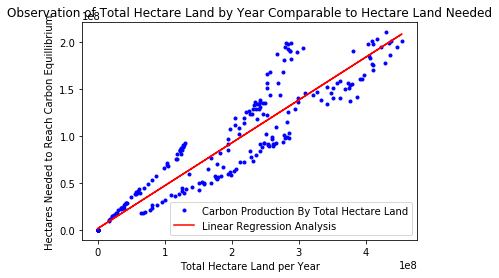

R-squared score:  0.9267095391030212


In [0]:
plt.plot(dataX_[0],dataY_[0],'b.', label = "Carbon Production By Total Hectare Land")
plt.plot(dataX_[0],yPredict[0], 'r', label = "Linear Regression Analysis")
plt.xlabel('Total Hectare Land per Year')
plt.ylabel('Hectares Needed to Reach Carbon Equillibrium')
plt.title('Observation of Total Hectare Land by Year Comparable to Hectare Land Needed')
plt.legend()
plt.show()
print('R-squared score: ', r2[0])

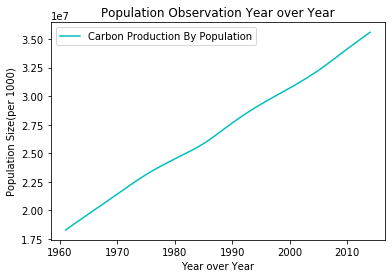

In [0]:
plt.plot(dataH_[0], dataZ_[0],'c', label = "Carbon Production By Population")
plt.xlabel('Year over Year')
plt.ylabel('Population Size(per 1000)')
plt.title('Population Observation Year over Year')
plt.legend()
plt.show()

## Second Observation - Japan

In [0]:
print(ledger.iloc[countryStart[1]])
print('#########################################')
print(ledger.iloc[countryEnd[1]])

country                            Japan
ISO alpha-3 code                     JPN
UN_region                           Asia
UN_subregion                Eastern Asia
year                                1961
record                      BiocapPerCap
crop_land                       0.273029
grazing_land                   0.0212669
forest_land                      0.47686
fishing_ground                  0.143234
built_up_land                  0.0962894
carbon                                 0
total                            1.01068
Percapita GDP (2010 USD)         9396.22
population                      93357000
Name: 38490, dtype: object
#########################################
country                            Japan
ISO alpha-3 code                     JPN
UN_region                           Asia
UN_subregion                Eastern Asia
year                                2014
record                      EFProdTotGHA
crop_land                    1.17271e+07
grazing_land                 

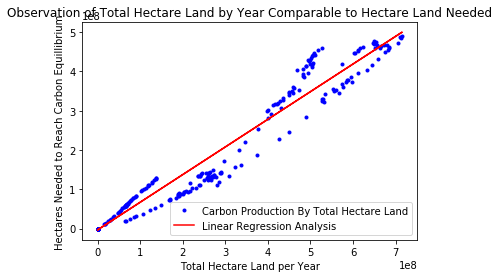

R-squared score:  0.9642145293232542


In [0]:
plt.plot(dataX_[1],dataY_[1],'b.', label = "Carbon Production By Total Hectare Land")
plt.plot(dataX_[1],yPredict[1], 'r', label = "Linear Regression Analysis")
plt.xlabel('Total Hectare Land per Year')
plt.ylabel('Hectares Needed to Reach Carbon Equillibrium')
plt.title('Observation of Total Hectare Land by Year Comparable to Hectare Land Needed')
plt.legend()
plt.show()
print('R-squared score: ', r2[1])

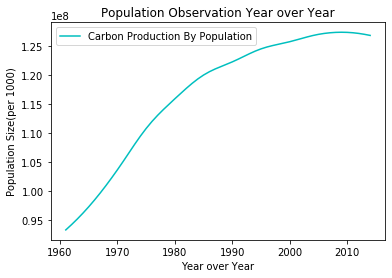

In [0]:
plt.plot(dataH_[1],dataZ_[1],'c', label = "Carbon Production By Population")
plt.xlabel('Year over Year')
plt.ylabel('Population Size(per 1000)')
plt.title('Population Observation Year over Year')
plt.legend()
plt.show()

## Third Observation - Ireland

In [0]:
print(ledger.iloc[countryStart[2]])
print('#########################################')
print(ledger.iloc[countryEnd[2]])

country                             Ireland
ISO alpha-3 code                        IRL
UN_region                            Europe
UN_subregion                Northern Europe
year                                   1967
record                         BiocapPerCap
crop_land                          0.693717
grazing_land                        1.21693
forest_land                        0.611652
fishing_ground                      2.47785
built_up_land                     0.0467593
carbon                                    0
total                               5.04691
Percapita GDP (2010 USD)                NaN
population                          2882000
Name: 35620, dtype: object
#########################################
country                             Ireland
ISO alpha-3 code                        IRL
UN_region                            Europe
UN_subregion                Northern Europe
year                                   2014
record                         EFProdTotGHA
crop_la

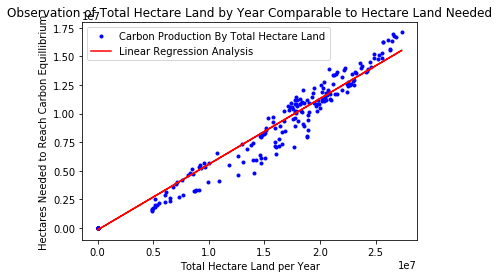

R-squared score:  0.9806535915742944


In [0]:
plt.plot(dataX_[2],dataY_[2],'b.', label = "Carbon Production By Total Hectare Land")
plt.plot(dataX_[2],yPredict[2], 'r', label = "Linear Regression Analysis")
plt.xlabel('Total Hectare Land per Year')
plt.ylabel('Hectares Needed to Reach Carbon Equillibrium')
plt.title('Observation of Total Hectare Land by Year Comparable to Hectare Land Needed')
plt.legend()
plt.show()
print('R-squared score: ', r2[2])

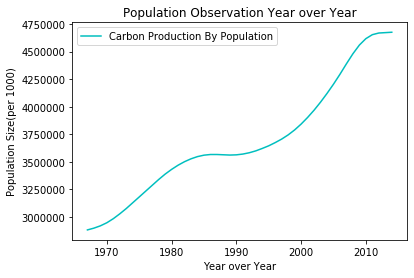

In [0]:
plt.plot(dataH_[2],dataZ_[2],'c', label = "Carbon Production By Population")
plt.xlabel('Year over Year')
plt.ylabel('Population Size(per 1000)')
plt.title('Population Observation Year over Year')
plt.legend()
plt.show()

## Fourth Observation - Nigeria

In [0]:
print(ledger.iloc[countryStart[3]])
print('#########################################')
print(ledger.iloc[countryEnd[3]])

country                            Nigeria
ISO alpha-3 code                       NGA
UN_region                           Africa
UN_subregion                Western Africa
year                                  1961
record                        BiocapPerCap
crop_land                         0.486872
grazing_land                      0.393767
forest_land                       0.146151
fishing_ground                   0.0719285
built_up_land                    0.0194969
carbon                                   0
total                              1.11822
Percapita GDP (2010 USD)           1276.29
population                        46144000
Name: 55390, dtype: object
#########################################
country                            Nigeria
ISO alpha-3 code                       NGA
UN_region                           Africa
UN_subregion                Western Africa
year                                  2014
record                        EFProdTotGHA
crop_land                   

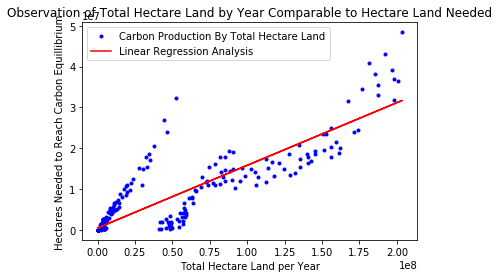

R-squared score:  0.8072427100825286


In [0]:
plt.plot(dataX_[3],dataY_[3],'b.', label = "Carbon Production By Total Hectare Land")
plt.plot(dataX_[3],yPredict[3], 'r', label = "Linear Regression Analysis")
plt.xlabel('Total Hectare Land per Year')
plt.ylabel('Hectares Needed to Reach Carbon Equillibrium')
plt.title('Observation of Total Hectare Land by Year Comparable to Hectare Land Needed')
plt.legend()
plt.show()
print('R-squared score: ', r2[3])

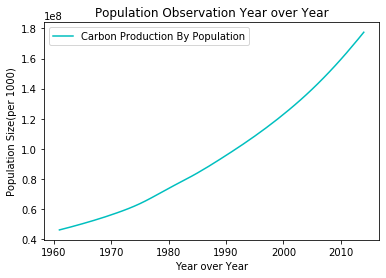

In [0]:
plt.plot(dataH_[3],dataZ_[3],'c', label = "Carbon Production By Population")
plt.xlabel('Year over Year')
plt.ylabel('Population Size(per 1000)')
plt.title('Population Observation Year over Year')
plt.legend()
plt.show()

## Fifth Observation - Australia

In [0]:
print(ledger.iloc[countryStart[4]])
print('#########################################')
print(ledger.iloc[countryEnd[4]])

country                                     Australia
ISO alpha-3 code                                  AUS
UN_region                                     Oceania
UN_subregion                Australia and New Zealand
year                                             1961
record                                   BiocapPerCap
crop_land                                     1.29651
grazing_land                                  15.8101
forest_land                                   4.64326
fishing_ground                                7.41805
built_up_land                               0.0241429
carbon                                              0
total                                         29.1921
Percapita GDP (2010 USD)                      19394.6
population                                   10495000
Name: 3280, dtype: object
#########################################
country                                     Australia
ISO alpha-3 code                                  AUS
UN_region     

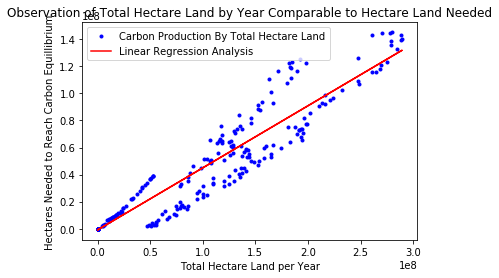

R-squared score:  0.9188896892632422


In [0]:
plt.plot(dataX_[4],dataY_[4],'b.', label = "Carbon Production By Total Hectare Land")
plt.plot(dataX_[4],yPredict[4], 'r', label = "Linear Regression Analysis")
plt.xlabel('Total Hectare Land per Year')
plt.ylabel('Hectares Needed to Reach Carbon Equillibrium')
plt.title('Observation of Total Hectare Land by Year Comparable to Hectare Land Needed')
plt.legend()
plt.show()
print('R-squared score: ', r2[4])

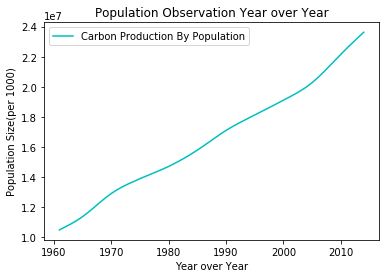

In [0]:
plt.plot(dataH_[4],dataZ_[4],'c', label = "Carbon Production By Population")
plt.xlabel('Year over Year')
plt.ylabel('Population Size(per 1000)')
plt.title('Population Observation Year over Year')
plt.legend()
plt.show()